In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Splitting the data

In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')

print(f"Original shape: {df.shape}")
df = df.dropna()
print(f"Shape after dropping NaNs: {df.shape}")

X, y = df.drop('Class', axis=1), df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Original shape: (568660, 31)
Shape after dropping NaNs: (568630, 31)


## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Implementing the linear regression

epoch: 1, train loss: 0.14619063271266114, val loss: 0.14599202523049903
epoch: 2, train loss: 0.07623733150598573, val loss: 0.07630338223388651
epoch: 3, train loss: 0.05079623248382843, val loss: 0.05089726529431247
epoch: 4, train loss: 0.040971410320027095, val loss: 0.04107280969732669
epoch: 5, train loss: 0.036918700598216704, val loss: 0.03702084376764351
epoch: 6, train loss: 0.03509850792860386, val loss: 0.03520637507946313
epoch: 7, train loss: 0.03419186780252628, val loss: 0.034309268460244124
epoch: 8, train loss: 0.0336882245040091, val loss: 0.0338171671871385
epoch: 9, train loss: 0.0333796374804022, val loss: 0.033520739440935185
epoch: 10, train loss: 0.033175391044558716, val loss: 0.03332837905249931
epoch: 11, train loss: 0.033032392063125714, val loss: 0.033196491516207766
epoch: 12, train loss: 0.03292818373452472, val loss: 0.033102381410903686
epoch: 13, train loss: 0.03284999441433248, val loss: 0.03303320240190179
epoch: 14, train loss: 0.03279001056282751

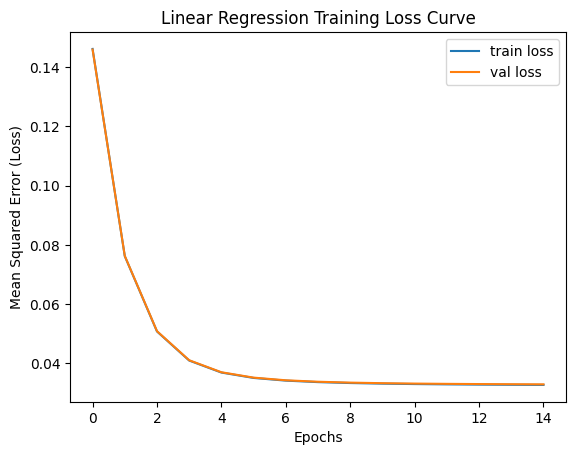

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd_reg = SGDRegressor(
    learning_rate='constant',
    eta0=1e-6,
    max_iter=1,
    warm_start=True,
    penalty='l2',
    random_state=42
)

train_losses = []
val_losses = []
epochs = 15

for epoch in range(epochs):
  sgd_reg.partial_fit(X_train, y_train)

  y_train_pred = sgd_reg.predict(X_train)
  train_loss = mean_squared_error(y_train, y_train_pred)
  train_losses.append(train_loss)

  y_val_pred = sgd_reg.predict(X_val)
  val_loss = mean_squared_error(y_val, y_val_pred)
  val_losses.append(val_loss)

  print(f'epoch: {epoch + 1}, train loss: {train_loss}, val loss: {val_loss}')

plt.plot(range(len(train_losses)), train_losses, label='train loss')
plt.plot(range(len(val_losses)), val_losses, label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Linear Regression Training Loss Curve')
plt.legend()
plt.show()

y_predict_final = sgd_reg.predict(X_test)

## Calculating the accuracy

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

y_pred_binary = (y_predict_final > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9885


## Plotting the confusion matrix

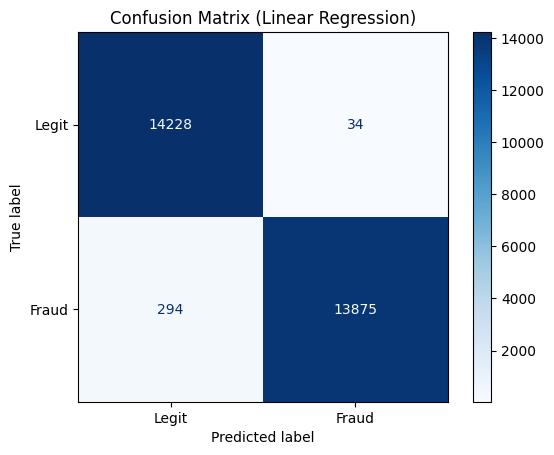

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Linear Regression)")
plt.show()

## Plotting the ROC curve

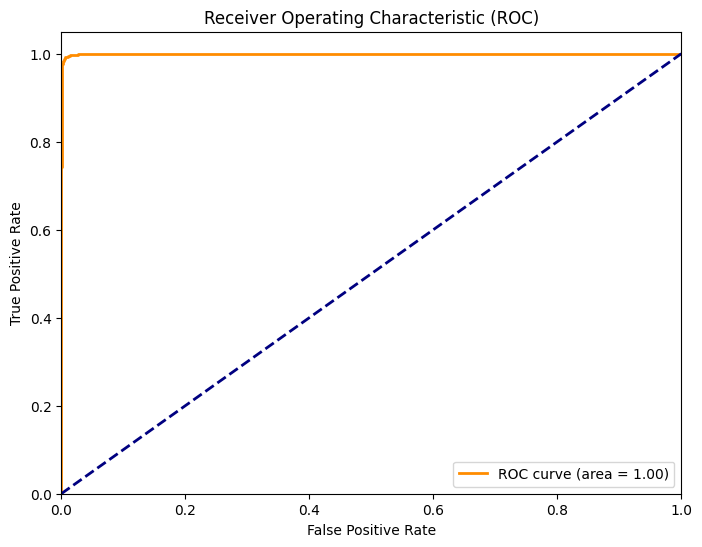

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_predict_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Implementing the KNN algorithm


k=3, R^2 Score: 0.9837
k=5, R^2 Score: 0.9828
k=7, R^2 Score: 0.9810
k=9, R^2 Score: 0.9798
k=11, R^2 Score: 0.9783
k=13, R^2 Score: 0.9766
k=15, R^2 Score: 0.9750


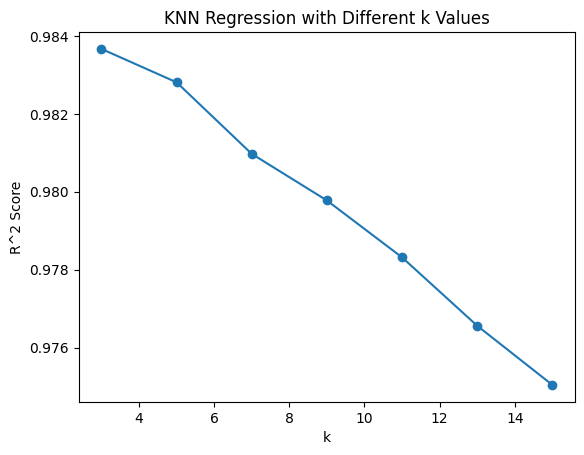

Best k value: 3


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

subset_size = 10000
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]

k_values = [3, 5, 7, 9, 11, 13, 15]
val_scores = []

for k in k_values:
  knn_reg = KNeighborsRegressor(n_neighbors=k, n_jobs = -1)
  knn_reg.fit(X_subset, y_subset)

  score = knn_reg.score(X_val, y_val)
  val_scores.append(score)
  print(f"k={k}, R^2 Score: {score:.4f}")

plt.plot(k_values, val_scores, marker='o')
plt.xlabel('k')
plt.ylabel('R^2 Score')
plt.title('KNN Regression with Different k Values')
plt.show()

best_k = k_values[np.argmax(val_scores)]
print(f"Best k value: {best_k}")

knn_final = KNeighborsRegressor(n_neighbors=best_k, n_jobs=-1)
knn_final.fit(X_train, y_train)

y_predict_final = knn_final.predict(X_test)

## Calculate the accuracy

In [ ]:

y_pred_binary = (y_predict_final > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"KNN Accuracy: {accuracy:.4f}\n")

KNN Accuracy: 0.9997



## Plotting the confusion matrix


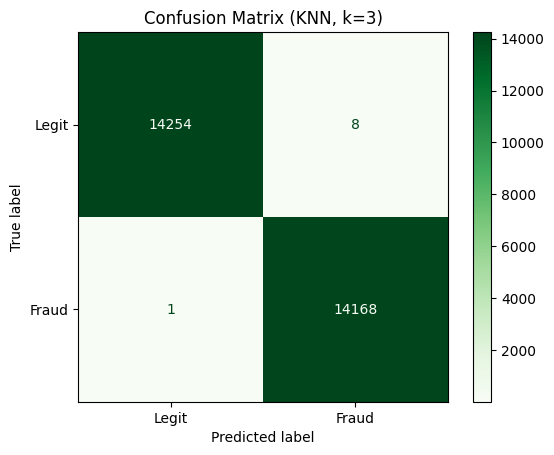

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp_cm.plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (KNN, k={best_k})")
plt.show()

## Plotting the ROC curve

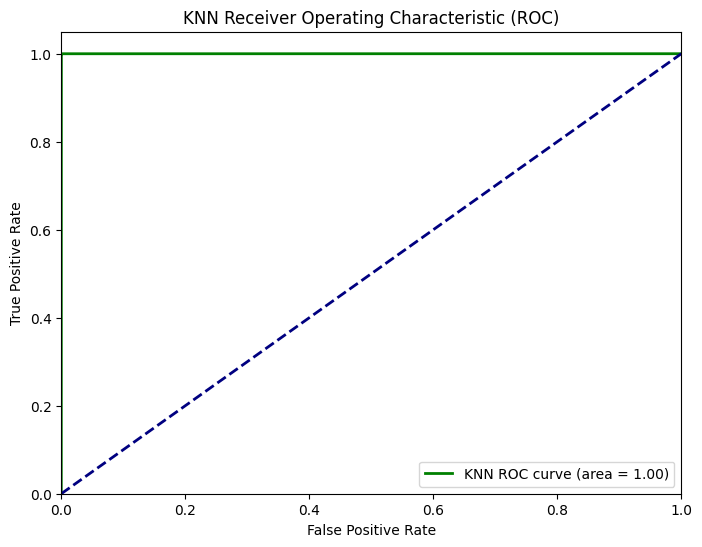

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_predict_final)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Exporting the model

In [12]:
import joblib

filename_scalar = 'scaler.joblib'
filename_knn = 'knn_model.joblib'
filename_sgd = 'sgd_reg_model.joblib'

joblib.dump(scaler, filename_scalar)
joblib.dump(knn_final, filename_knn)
joblib.dump(sgd_reg, filename_sgd)

print(f"Saved artifacts: {filename_scalar}, {filename_knn}, {filename_sgd}")

Saved artifacts: scaler.joblib, knn_model.joblib, sgd_reg_model.joblib
